# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 328081248
sectors = np.array([54])

period = 4.1647720505 
tdepth = 0.0020526791415986048

lc_file = "TOI_5799_S54.csv"
contrastcurve_file = "TOI_5799_BrGamma.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

Sector 54


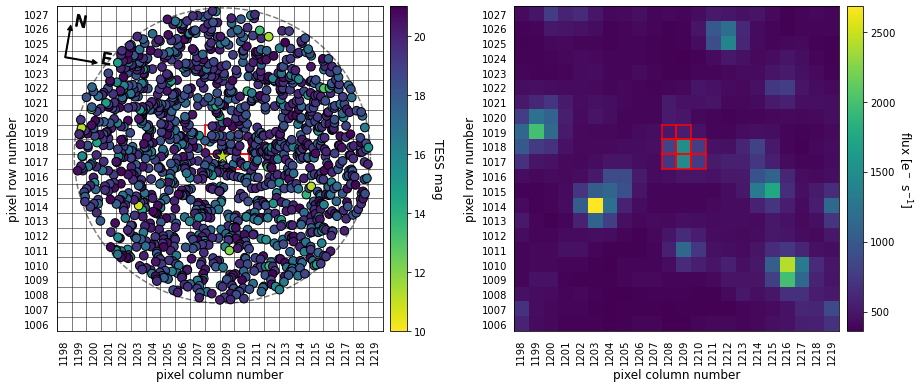

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,328081248,11.1798,9.742,9.192,8.952,301.629383,15.988090,0.32653,0.343358,3521.0,35.926400,0.000,0.000
1,1940606733,20.3284,NaN,NaN,NaN,301.627315,15.988290,NaN,NaN,NaN,NaN,7.193,275.740
2,1940606734,20.6761,NaN,NaN,NaN,301.629492,15.990631,NaN,NaN,NaN,NaN,9.153,2.345
3,1940606723,20.1194,NaN,NaN,NaN,301.629053,15.991675,NaN,NaN,NaN,-0.637649,12.957,354.936
4,1940606715,18.4499,NaN,NaN,NaN,301.628555,15.991636,0.73000,0.881793,4618.0,0.162616,13.083,347.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1940610324,18.2706,NaN,NaN,NaN,301.675884,16.022073,0.94000,0.609638,5409.0,0.288533,202.139,52.749
1332,1940606411,20.8199,NaN,NaN,NaN,301.590946,15.945720,NaN,NaN,NaN,NaN,202.398,221.099
1333,328081154,17.3053,16.479,16.045,15.656,301.682021,16.012616,0.83000,1.009320,5008.0,0.335316,202.425,64.133
1334,1940609675,18.4348,NaN,NaN,NaN,301.687643,15.983054,0.64000,1.053630,4103.0,0.273082,202.438,95.130


In [4]:
ap54 = np.array([[1208, 1017],[1209, 1017],[1210, 1017],[1208, 1018],
                 [1209, 1018],[1210, 1018],[1208, 1019],[1209, 1019]])

apertures = np.array([ap54])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,328081248,11.1798,9.742,9.192,8.952,301.629383,15.988090,0.32653,0.343358,3521.0,35.926400,0.000,0.000,9.101928e-01,0.002255
1,1940606733,20.3284,NaN,NaN,NaN,301.627315,15.988290,NaN,NaN,NaN,NaN,7.193,275.740,1.902536e-04,0.000000
2,1940606734,20.6761,NaN,NaN,NaN,301.629492,15.990631,NaN,NaN,NaN,NaN,9.153,2.345,1.541850e-04,0.000000
3,1940606723,20.1194,NaN,NaN,NaN,301.629053,15.991675,NaN,NaN,NaN,-0.637649,12.957,354.936,2.554992e-04,0.000000
4,1940606715,18.4499,NaN,NaN,NaN,301.628555,15.991636,0.73000,0.881793,4618.0,0.162616,13.083,347.346,1.181666e-03,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1940610324,18.2706,NaN,NaN,NaN,301.675884,16.022073,0.94000,0.609638,5409.0,0.288533,202.139,52.749,1.454724e-28,0.000000
1332,1940606411,20.8199,NaN,NaN,NaN,301.590946,15.945720,NaN,NaN,NaN,NaN,202.398,221.099,1.548178e-33,0.000000
1333,328081154,17.3053,16.479,16.045,15.656,301.682021,16.012616,0.83000,1.009320,5008.0,0.335316,202.425,64.133,8.077693e-29,0.000000
1334,1940609675,18.4348,NaN,NaN,NaN,301.687643,15.983054,0.64000,1.053630,4103.0,0.273082,202.438,95.130,1.792344e-30,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i,"",target.stars['ID'][i])

10  328081257
26  328081228
40  328081289
51  328081255
60  328081222
101  328081223
112  328081200
156  328081252
176  328081182


In [7]:
'''target.stars['tdepth'][10] = 0
target.stars['tdepth'][26] = 0
target.stars['tdepth'][40] = 0
target.stars['tdepth'][60] = 0
target.stars['tdepth'][112] = 0
target.stars['tdepth'][156] = 0
target.stars['tdepth'][176] = 0
'''

"target.stars['tdepth'][10] = 0\ntarget.stars['tdepth'][26] = 0\ntarget.stars['tdepth'][40] = 0\ntarget.stars['tdepth'][60] = 0\ntarget.stars['tdepth'][112] = 0\ntarget.stars['tdepth'][156] = 0\ntarget.stars['tdepth'][176] = 0\n"

# Ploting CC File

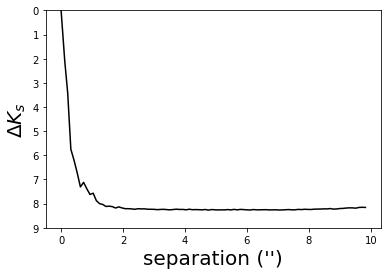

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 516 ms
Wall time: 521 ms


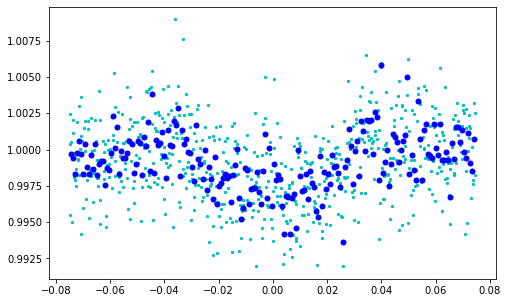

In [9]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
%%time
FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 328081248.
Calculating EB and EBx2P scenario probabilities for 328081248.
Calculating PTP scenario probability for 328081248.
Calculating PEB and PEBx2P scenario probabilities for 328081248.
Calculating STP scenario probability for 328081248.
Calculating SEB and SEBx2P scenario probabilities for 328081248.
Calculating DTP scenario probability for 328081248.
Calculating DEB and DEBx2P scenario probabilities for 328081248.
Calculating BTP scenario probability for 328081248.
Calculating BEB and BEBx2P scenario probabilities for 328081248.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081257.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081228.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081289.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081255.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081222.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 3

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.00023465103438491397
NFPP =  0.00018840723288127928


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,328081248,TP,0.326530,0.343358,4.164772,89.423035,0.229327,9.773156e-02,329.326488,1.859257,0.000000,0.000000,8.844697e-01
1,328081248,EB,0.326530,0.343358,4.164772,85.407893,1.634080,2.613447e-01,68.746361,0.000000,0.306575,0.323453,7.681647e-30
2,328081248,EBx2P,0.326530,0.343358,8.329544,88.453525,0.592204,7.650405e-01,193.329619,0.000000,0.321405,0.336003,4.102724e-07
3,328081248,PTP,0.326530,0.343358,4.164772,89.881011,0.045168,1.062876e-01,356.303629,1.985263,0.000000,0.000000,7.443668e-04
4,328081248,PEB,0.326530,0.343358,4.164772,85.798969,1.571537,2.149978e-01,79.312448,0.000000,0.306711,0.323569,3.846337e-28
5,328081248,PEBx2P,0.326530,0.343358,8.329544,88.260511,1.045711,6.424645e-01,203.799462,0.000000,0.315830,0.331295,3.388853e-07
6,328081248,STP,0.317749,0.332917,4.164772,89.629698,0.118347,1.862418e-01,71.933978,2.601718,0.000000,0.000000,2.485300e-05
7,328081248,SEB,0.105014,0.127090,4.164772,88.219106,1.402891,3.372165e-02,212.789866,0.000000,0.033676,0.100000,7.989782e-24
8,328081248,SEBx2P,0.292947,0.311845,8.329544,88.346401,1.105148,6.290317e-01,205.438952,0.000000,0.287270,0.306985,6.791703e-07
9,328081248,DTP,0.326530,0.343358,4.164772,89.408623,0.203693,1.233212e-01,46.986194,1.843039,0.000000,0.000000,1.145513e-01


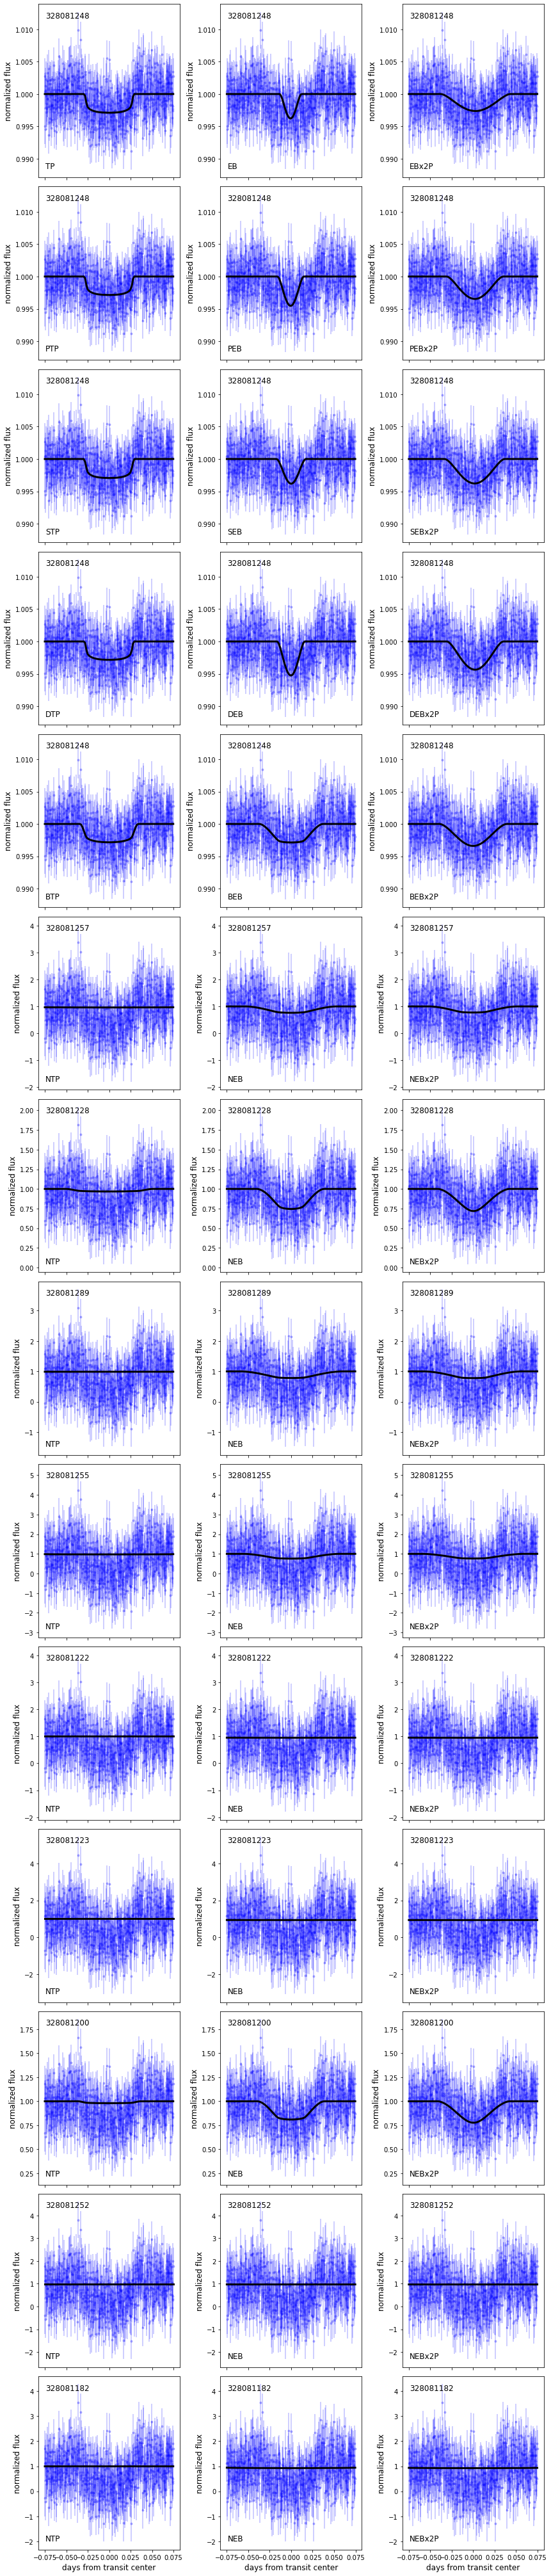

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [13]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.0002049846676958067 ,
0.00020659068448181106 ,
0.00021014428982446542 ,
0.00024714255104718585 ,
0.00023465103438491397 ,
NFPPs:
0.00018246970362271507 ,
0.00016090826506113265 ,
0.00017315500186650964 ,
0.00017982317136597825 ,
0.00018840723288127928 ,


In [14]:
##K filter

fpp=np.array([0.0002049846676958067 ,
0.00020659068448181106 ,
0.00021014428982446542 ,
0.00024714255104718585 ,
0.00023465103438491397])
nfpp=np.array([0.00018246970362271507 ,
0.00016090826506113265 ,
0.00017315500186650964 ,
0.00017982317136597825 ,
0.00018840723288127928])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.0002207026454868366 +/- 1.7037061380601946e-05
0.00017695267495952297 +/- 9.399251693425266e-06
